In [1]:
import urllib.request
import pandas as pd
import bs4
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
import scipy.stats
from sklearn import manifold

In [2]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [3]:
top =pd.read_csv('./data/topmart_shop_info_loc.csv',encoding='utf-8')
top.head()

,store,address,Latitude,Longitude,tel
0,탑마트 영도봉래점,부산광역시 영도구 태종로 194,35.094210,129.049444,051)418-2102~3
1,탑마트 진영점,경상남도 김해시 진영읍 진영로 221,35.302670,128.736928,055)345-0388~9
2,탑마트 금사점,부산광역시 금정구 공단서로 22 (강산병원 옆),35.216975,129.110783,051)527-2222
3,탑마트 통영점,경상남도 통영시 미수해안로 164-13 (봉평오거리 옆),34.832157,128.413960,055)648-8161~3
4,탑마트 진주점,경상남도 진주시 도동로 251,35.192582,128.121298,055)762-2571~5


In [4]:
top = pd.DataFrame(top['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
top

,d1,d2
0,부산광역시,영도구
1,경상남도,김해시
2,부산광역시,금정구
3,경상남도,통영시
4,경상남도,진주시
...,...,...
72,경상남도,진주시
73,대구광역시,중구
74,경상남도,양산시
75,경상북도,경주시


In [5]:
T = top.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
T.head()

경상남도 김해시     7
경상남도 창원시     7
경상남도 진주시     6
부산광역시 사하구    6
경상북도 포항시     4
dtype: int64

In [6]:
emart =pd.read_csv('./data/Emart_info.csv',encoding='utf-8')
emart.head()

,store,address,Latitude,Longitude,tel
0,이마트 가든5점,서울특별시 송파구 충민로 10,37.478232,127.119370,02-411-1234
1,이마트 가양점,서울특별시 강서구 양천로 559,37.557897,126.862298,02-2101-1234
2,이마트 강릉점,강원도 강릉시 경강로 2398-10,37.770583,128.922618,033-649-1234
3,이마트 검단점,인천광역시 서구 서곶로 754,37.585534,126.677194,032-440-1234
4,이마트 경기광주점,경기도 광주시 광주대로 30,37.409522,127.261229,031-8026-1234


In [7]:
emart = pd.DataFrame(emart['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
emart

,d1,d2
0,서울특별시,송파구
1,서울특별시,강서구
2,강원도,강릉시
3,인천광역시,서구
4,경기도,광주시
...,...,...
132,서울특별시,성북구
133,부산광역시,해운대구
134,경기도,화성시
135,경기도,고양시


In [8]:
E = emart.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
E.head()

경기도 용인시     6
경기도 남양주시    4
경기도 고양시     4
충청남도 천안시    3
경기도 수원시     3
dtype: int64

In [9]:
home =pd.read_csv('./data/Homeplus_shop_info_loc4.csv',encoding='utf-8')
home.head()

,store,address,Latitude,Longitude,tel
0,홈플러스 가양점,서울특별시 강서구 양천로 431,37.564245,126.849942,02-2063-2080
1,홈플러스 가좌점,인천광역시 서구 가정로 151번길 11,37.497567,126.670690,032-453-8000
2,홈플러스 간석점,인천광역시 남동구 경원대로 971,37.469524,126.689069,032-870-8000
3,홈플러스 강동점,서울특별시 강동구 양재대로 1571(메르디안 쇼핑센터),37.545658,127.142244,02-3400-8000
4,홈플러스 강릉점,강원도 강릉시 경강로 2120,37.755659,128.898621,033-649-8000


In [10]:
home = pd.DataFrame(home['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
home

,d1,d2
0,서울특별시,강서구
1,인천광역시,서구
2,인천광역시,남동구
3,서울특별시,강동구
4,강원도,강릉시
...,...,...
129,경상북도,포항시
130,서울특별시,마포구
131,부산광역시,해운대구
132,경기도,화성시


In [11]:
H = home.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
H.head()

경기도 수원시      5
충청북도 청주시     3
인천광역시 남동구    3
경상남도 창원시     3
서울특별시 중랑구    3
dtype: int64

In [12]:
lotte =pd.read_csv('./data/Homeplus_shop_info_loc4.csv',encoding='utf-8')
lotte.head()

,store,address,Latitude,Longitude,tel
0,홈플러스 가양점,서울특별시 강서구 양천로 431,37.564245,126.849942,02-2063-2080
1,홈플러스 가좌점,인천광역시 서구 가정로 151번길 11,37.497567,126.670690,032-453-8000
2,홈플러스 간석점,인천광역시 남동구 경원대로 971,37.469524,126.689069,032-870-8000
3,홈플러스 강동점,서울특별시 강동구 양재대로 1571(메르디안 쇼핑센터),37.545658,127.142244,02-3400-8000
4,홈플러스 강릉점,강원도 강릉시 경강로 2120,37.755659,128.898621,033-649-8000


In [13]:
lotte = pd.DataFrame(lotte['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
lotte

,d1,d2
0,서울특별시,강서구
1,인천광역시,서구
2,인천광역시,남동구
3,서울특별시,강동구
4,강원도,강릉시
...,...,...
129,경상북도,포항시
130,서울특별시,마포구
131,부산광역시,해운대구
132,경기도,화성시


In [14]:
L = lotte.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
L.head()

경기도 수원시      5
충청북도 청주시     3
인천광역시 남동구    3
경상남도 창원시     3
서울특별시 중랑구    3
dtype: int64

In [15]:
THEL = pd.DataFrame({'T':T,'H':H,'E':E, 'L':L}).fillna(0)
THEL['total'] =THEL.sum(axis=1)
THEL = THEL.sort_values(by=['total'], ascending=False)
THEL.head()

,T,H,E,L,total
경상남도 창원시,7.0,3.0,2.0,3.0,15.0
경기도 수원시,0.0,5.0,3.0,5.0,13.0
경상북도 포항시,4.0,2.0,2.0,2.0,10.0
경상남도 김해시,7.0,1.0,1.0,1.0,10.0
경기도 고양시,0.0,3.0,4.0,3.0,10.0


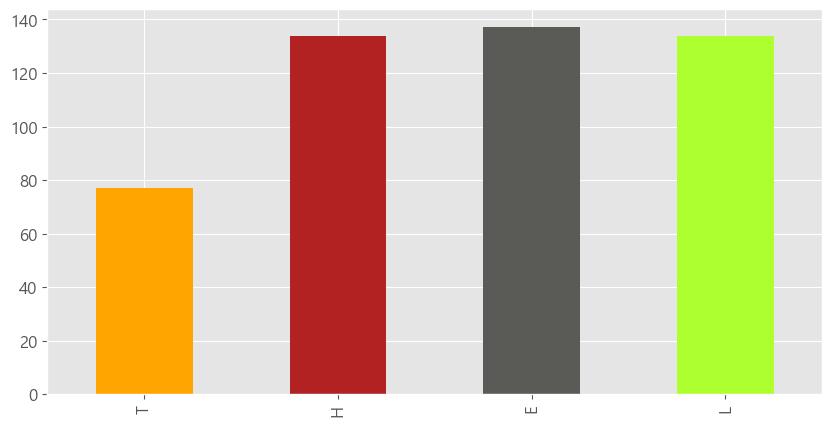

In [16]:
style.use('ggplot')
rcParams['font.size'] = 12

plt.figure(figsize=(10, 5))
colors = ['#FFA500','#B22222','#5A5B57','#ADFF2F']
THEL.sum(axis=0).iloc[:4].plot(kind='bar', color=colors)
plt.show()

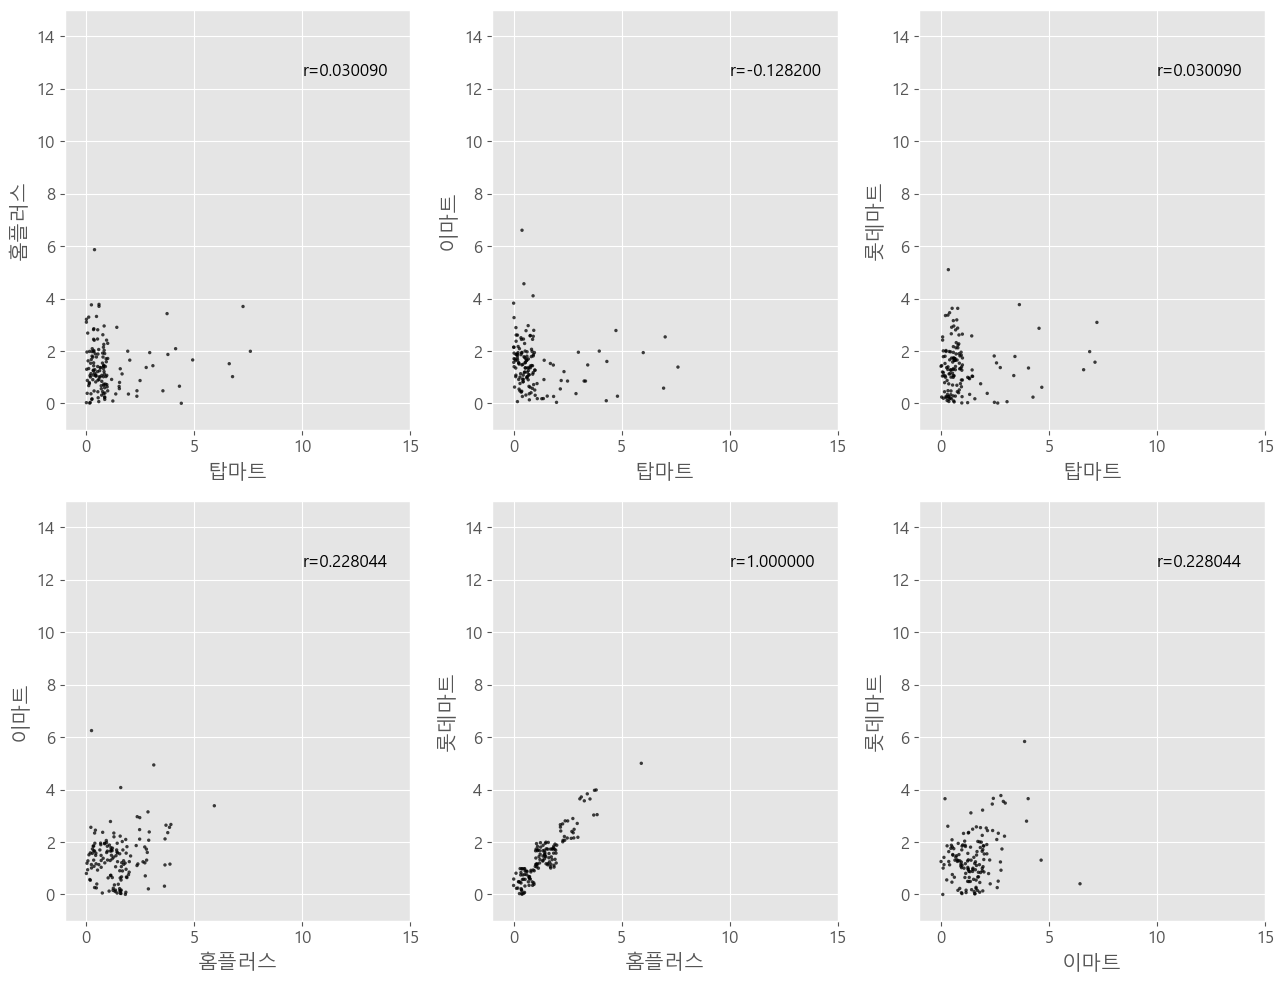

In [17]:
fig = plt.figure(figsize=(13, 10))

def plot_nstores(b1, b2, label1, label2):
    plt.scatter(THEL[b1] + np.random.random(len(THEL)),
                THEL[b2] + np.random.random(len(THEL)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15)
    plt.ylim(-1, 15)
    plt.xlabel(label1)
    plt.ylabel(label2)

    r = scipy.stats.pearsonr(THEL[b1], THEL[b2])
    plt.annotate('r={:3f}'.format(r[0]),(10,12.5))

ax = fig.add_subplot(2,3,1)
plot_nstores('T', 'H', '탑마트', '홈플러스')

ax = fig.add_subplot(2,3,2)
plot_nstores('T', 'E', '탑마트', '이마트')

ax = fig.add_subplot(2,3,3)
plot_nstores('T', 'L', '탑마트', '롯데마트')

ax = fig.add_subplot(2,3,4)
plot_nstores('H', 'E', '홈플러스', '이마트')

ax = fig.add_subplot(2,3,5)
plot_nstores('H', 'L', '홈플러스', '롯데마트')

ax = fig.add_subplot(2,3,6)
plot_nstores('E', 'L', '이마트', '롯데마트')


plt.tight_layout()

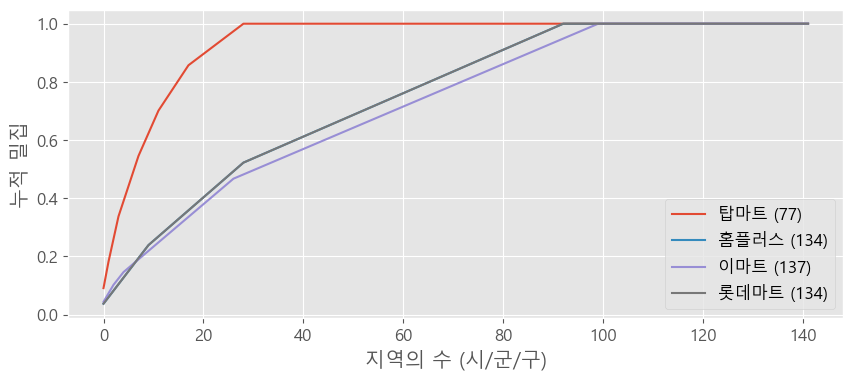

In [18]:
plt.figure(figsize=(10,4))
for col, label in [('T', '탑마트'),('H','홈플러스'),('E','이마트'),('L','롯데마트')]:
    cumulv = np.cumsum(sorted(THEL[col], reverse=True)) / THEL[col].sum()
    plt.plot(cumulv, label='{} ({})'.format(label, int(THEL[col].sum())))
plt.legend(loc='best')
plt.xlabel('지역의 수 (시/군/구)')
plt.ylabel('누적 밀집')
plt.show()

In [19]:
!pip3 install openpyxl

In [20]:
population =pd.read_excel('./인구수.xlsx')
population.head()

,d1,d2,population,남자인구수,여자인구수
0,전국,소계,51574446,25708650,25865796
1,서울특별시,소계,9493211,4604405,4888806
2,서울특별시,종로구,143547,69463,74084
3,서울특별시,중구,122138,59360,62778
4,서울특별시,용산구,222262,106743,115519


In [21]:
for item in range(0, len(population)):
    population['d2'][item] = population['d2'][item].strip()

C:\Users\HOME\AppData\Local\Temp\ipykernel_25780\4042398491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['d2'][item] = population['d2'][item].strip()


In [22]:
population.tail()

,d1,d2,population,남자인구수,여자인구수
287,경상남도,거창군,60531,29716,30815
288,경상남도,합천군,42482,20584,21898
289,제주특별자치도,소계,678491,339951,338540
290,제주특별자치도,제주시,493898,246826,247072
291,제주특별자치도,서귀포시,184593,93125,91468


In [23]:
population['name'] = population.apply(lambda i: i['d1'] + ' ' + i['d2'], axis='columns')
population.head()

,d1,d2,population,남자인구수,여자인구수,name
0,전국,소계,51574446,25708650,25865796,전국 소계
1,서울특별시,소계,9493211,4604405,4888806,서울특별시 소계
2,서울특별시,종로구,143547,69463,74084,서울특별시 종로구
3,서울특별시,중구,122138,59360,62778,서울특별시 중구
4,서울특별시,용산구,222262,106743,115519,서울특별시 용산구


In [24]:
population = population.set_index('name')
population.head()

,d1,d2,population,남자인구수,여자인구수
name,,,,,
전국 소계,전국,소계,51574446,25708650,25865796
서울특별시 소계,서울특별시,소계,9493211,4604405,4888806
서울특별시 종로구,서울특별시,종로구,143547,69463,74084
서울특별시 중구,서울특별시,중구,122138,59360,62778
서울특별시 용산구,서울특별시,용산구,222262,106743,115519


In [25]:
thel = pd.DataFrame({'T':T, 'H':H, 'L':L, 'E':E}).fillna(0)
thel = pd.merge(population, thel, how='outer', left_index=True, right_index=True)
thel.head()

,d1,d2,population,남자인구수,여자인구수,T,H,L,E
강원도 강릉시,강원도,강릉시,212260.0,105312.0,106948.0,0.0,1.0,1.0,1.0
강원도 고성군,강원도,고성군,27316.0,14084.0,13232.0,NaN,NaN,NaN,NaN
강원도 동해시,강원도,동해시,89683.0,45584.0,44099.0,0.0,0.0,0.0,1.0
강원도 삼척시,강원도,삼척시,64046.0,32390.0,31656.0,0.0,1.0,1.0,0.0
강원도 소계,강원도,소계,1539178.0,774387.0,764791.0,NaN,NaN,NaN,NaN


In [26]:
thel=thel.drop('남자인구수', axis='columns')

In [27]:
thel=thel.drop('여자인구수', axis='columns')

In [28]:
thel[thel['d1'].isnull()]

,d1,d2,population,T,H,L,E
세종특별자치시 금송로,NaN,NaN,NaN,0.0,0.0,0.0,1.0
세종특별자치시 절재로,NaN,NaN,NaN,0.0,1.0,1.0,0.0
세종특별자치시 조치원읍,NaN,NaN,NaN,0.0,1.0,1.0,0.0
인천광역시 남구,NaN,NaN,NaN,0.0,1.0,1.0,0.0
충청북도 청원군,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [29]:
thel[(thel['T'] + thel['E'] + thel['H'] + thel['L']) == 0]

,d1,d2,population,T,H,L,E
